In [10]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import proplot as pplt
from scipy.fftpack import * 

### 用GMT中得到的点进行边界的连线
子图数量起来的话速度较慢

In [11]:
# Load the border data, CN-border-La.dat is download from
# https://gmt-china.org/data/CN-border-La.dat
import cartopy.crs as ccrs
cn_border_file = "/m2data2/yycheng/data_stage/CN-border/CN-border-La.dat"
with open(cn_border_file) as src:
    context = src.read()
    blocks = [cnt for cnt in context.split('>') if len(cnt) > 0]
    borders = [np.fromstring(block, dtype=float, sep=' ') for block in blocks]


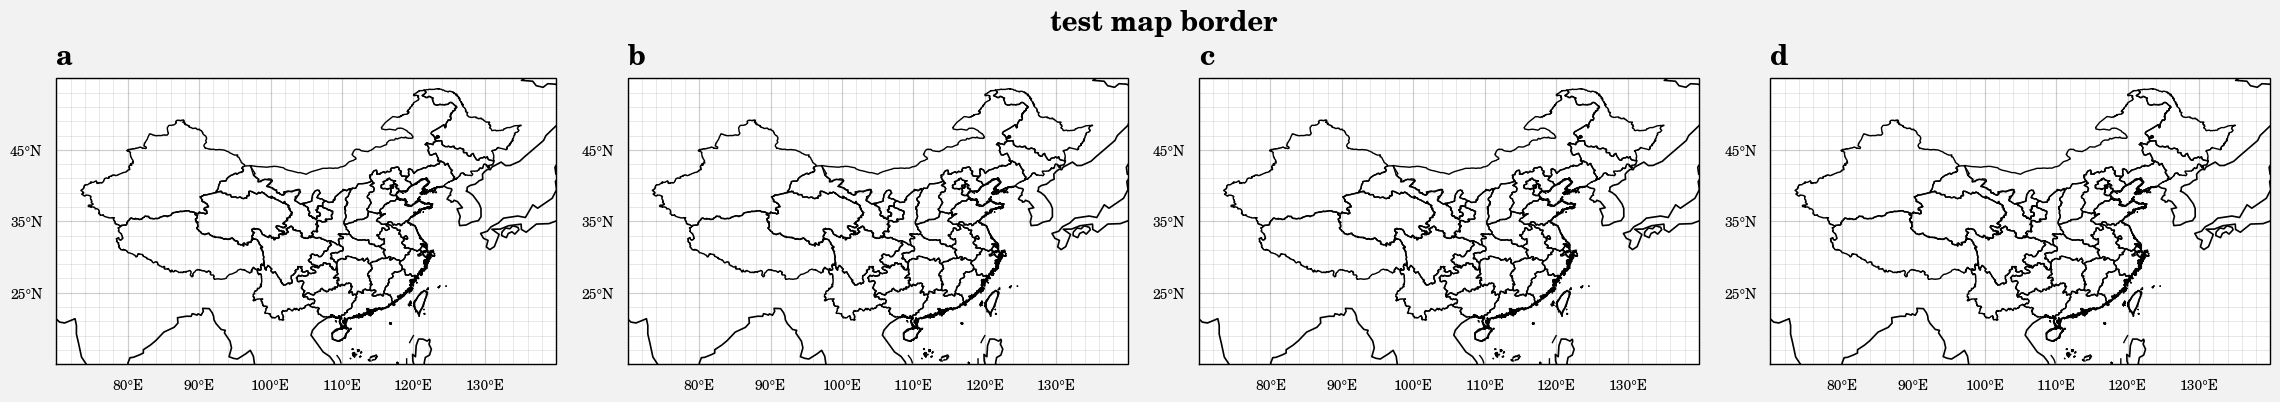

In [12]:
fig, axs = pplt.subplots(ncols=4,nrows=1, proj=('cyl'))
plt.style.use(['science', 'no-latex']) # 采用 安装的scinence绘图风格，matplotlib风格拓展
# ----- format setting -----

# for ax_ind in axs:
for line in borders:
    # axs.plot(line[0::100], line[1::100], lw = 0.5, color='gray',transform=ccrs.Geodetic())
    axs.plot(line[0::10], line[1::10], lw = 0.5, color='black',transform=ccrs.Geodetic())

    # ax_ind = axs[0]

axs.format(
abc=True,
lonlim=(70, 140), latlim=(15, 55),
# lonlim=(60, 100), latlim=(10, 40),
#----- 地图底图设置 -----
# reso = 'x-hi',
coast = True,
borders = False,
lakes = False,
#-----GEO axis-----
labels = True,
gridlabelsize = 5,
gridminor = True,
# ticklen = 10,
# borderslinewidth=.5,
# longridminor= False,
# latgridminor= False,
# lonminorlocator = 
longrid  = True,
latgrid  = True,
# latlines = 10,
# lonlines = 10,
lonlocator = np.arange(70,140,10),
latlocator = np.arange(15,65,10),
lonminorlocator = np.arange(70,140+2,2),
latminorlocator = np.arange(15,55+2,2),
#-----line label-----
# linewidth = 0.5,
# suptitle="3000km-2000km bandpass 500hPa height(1998-06 timemean)",
suptitle="test map border",
)

### 用shapefile解决问题

速度相比拉线显然更快

可以添加其他的shp file进行绘制

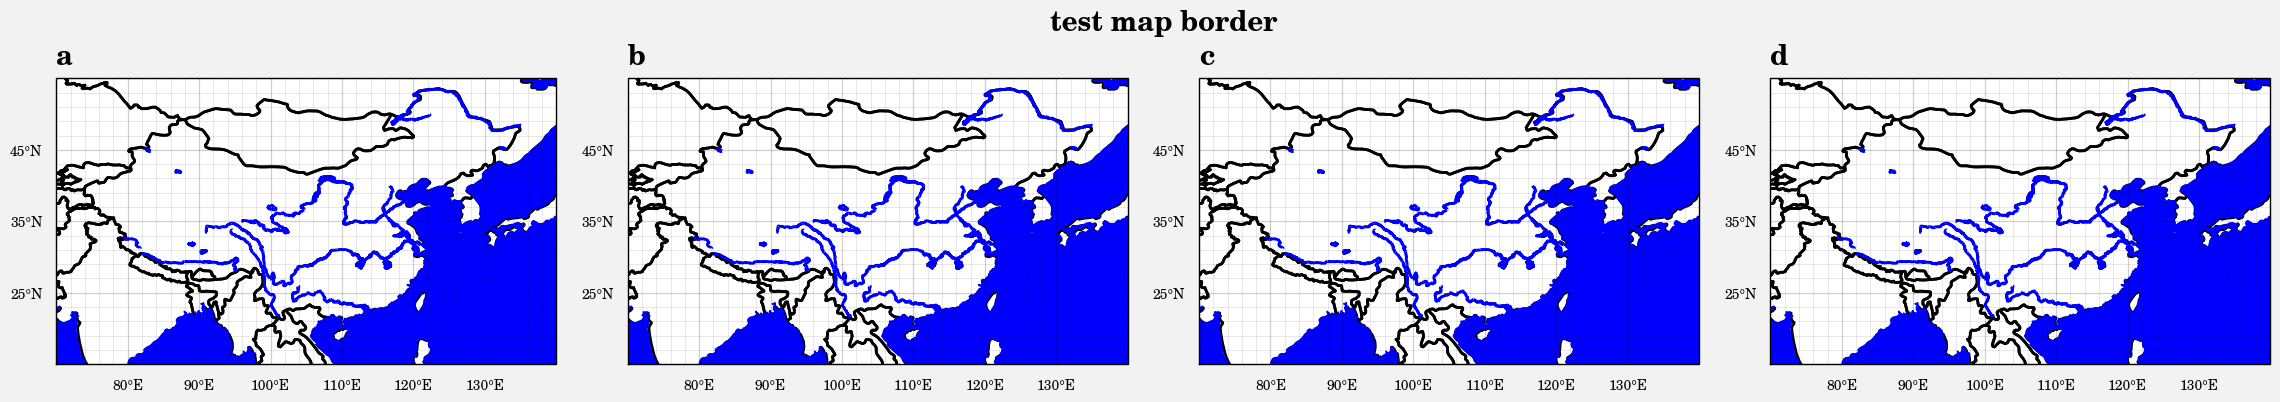

In [13]:
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## shapefile数据下载的位置：
## http://gaohr.win/site/blogs/2017/2017-04-18-GIS-basic-data-of-China.html
world_border_shapefile = "/m2data2/yycheng/data_stage/CN-border/World/country.shp"
river_border_shapefile =  "/m2data2/yycheng/data_stage/CN-border/R1/" + "hyd1_4l.shp"

fig, axs = pplt.subplots(ncols=4,nrows=1, proj=('cyl'))
plt.style.use(['science', 'no-latex']) # 采用 安装的scinence绘图风格，matplotlib风格拓展

for ax in axs:
    world = shpreader.Reader(world_border_shapefile).geometries()
    river = shpreader.Reader(river_border_shapefile).geometries()
    ax.add_geometries(world, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=1, zorder=1)
    ax.add_geometries(river, ccrs.PlateCarree(), facecolor='none', edgecolor='b', linewidth=1, zorder=1)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='b'))
# ----- format setting -----
axs.format(
abc=True,
lonlim=(70, 140), latlim=(15, 55),
# lonlim=(60, 100), latlim=(10, 40),
#----- 地图底图设置 -----
reso = 'x-hi',
coast = False,
borders = False,
lakes = False,
ocean = False,
#-----GEO axis-----
labels = True,
gridlabelsize = 5,
gridminor = True,
# ticklen = 10,
# borderslinewidth=.5,
# longridminor= False,
# latgridminor= False,
# lonminorlocator = 
longrid  = True,
latgrid  = True,
# latlines = 10,
# lonlines = 10,
lonlocator = np.arange(70,140,10),
latlocator = np.arange(15,65,10),
lonminorlocator = np.arange(70,140+2,2),
latminorlocator = np.arange(15,55+2,2),
#-----line label-----
# linewidth = 0.5,
# suptitle="3000km-2000km bandpass 500hPa height(1998-06 timemean)",
suptitle="test map border",
)

## shapefile选取特定区域的部分进行绘制

想重叠上面两张图，在省份的基础上补齐九段线、省界之类的玩意

确实，去掉了中国，但是没有去掉中国的邻国，约等于没有去掉

----- skip china! -----
----- skip china! -----
----- skip china! -----
----- skip china! -----


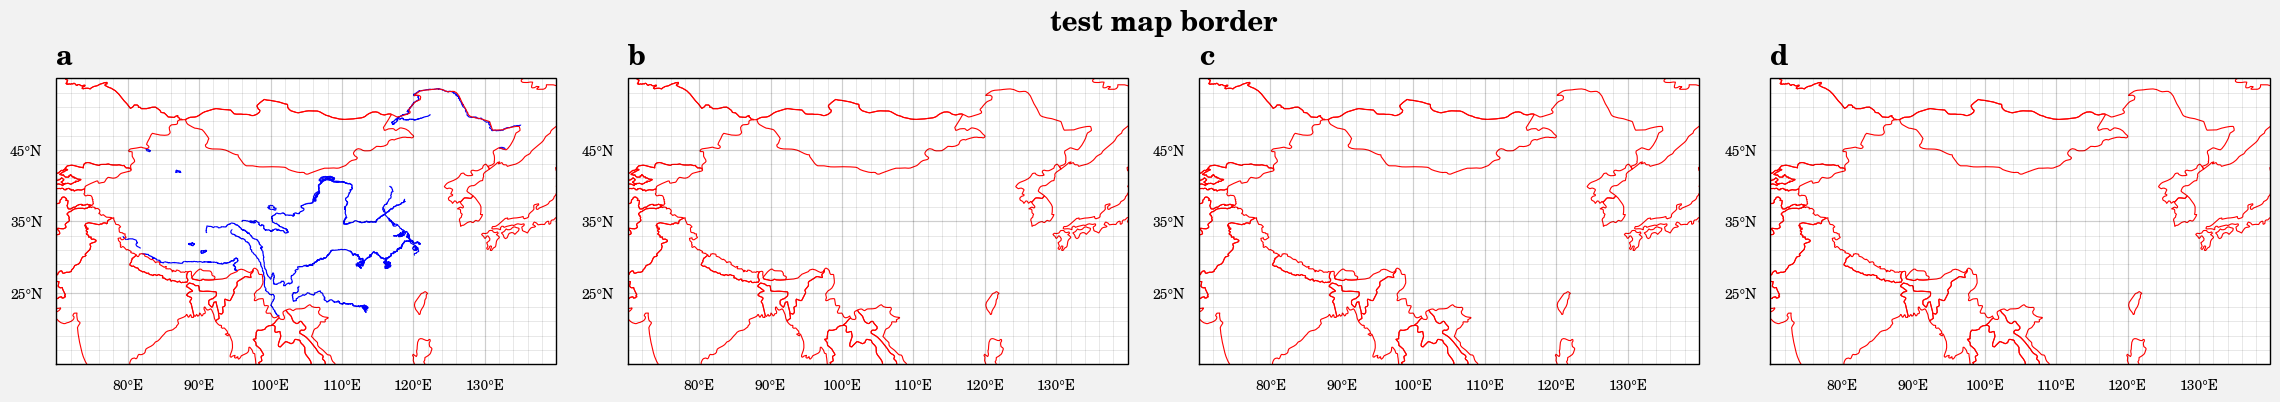

In [14]:
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, axs = pplt.subplots(ncols=4,nrows=1, proj=('cyl'))
plt.style.use(['science', 'no-latex']) # 采用 安装的scinence绘图风格，matplotlib风格拓展


    ## shapefile数据下载的位置：
## http://gaohr.win/site/blogs/2017/2017-04-18-GIS-basic-data-of-China.html
world_border_shapefile = "/m2data2/yycheng/data_stage/CN-border/World/country.shp"
river_border_shapefile =  "/raid52/yycheng/MPAS/REFERENCE/MODEL_CONSTANT/R1/" + "hyd1_4l.shp"

# world = shpreader.Reader(world_border_shapefile).geometries()
world = shpreader.Reader(world_border_shapefile)#.geometries()
river = shpreader.Reader(river_border_shapefile).geometries()

# Filter for a specific country
# 去除掉 China，以免和直接连线相互重合
# world_remove_china = [country for country in reader.records() if ((country.attributes["NAME"] != "China") & (country.attributes["NAME"] != "Taiwan"))]

for ax in axs:
    ax.add_geometries(river, ccrs.PlateCarree(), facecolor='none', edgecolor='b', linewidth=0.4, zorder=1)
    for region in world.records():
        if (region.attributes['NAME'] == 'China'):
            print("----- skip china! -----")
            continue
        ax.add_geometries(region.geometry, ccrs.PlateCarree(), facecolor='none', edgecolor='r', linewidth=0.4, zorder=1)
    # ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='b'))
    # ax.add_feature(cfeature.OCEAN) # 添加海洋填色
    # ax.set_global() # added following an answer to my question 并不知道有什么用，先加着
    # ax.gridlines()



# ----- format setting -----
axs.format(
abc=True,
lonlim=(70, 140), latlim=(15, 55),
# lonlim=(60, 100), latlim=(10, 40),
#----- 地图底图设置 -----
reso = 'x-hi',
coast = False,
borders = False,
lakes = False,
ocean = False,
#-----GEO axis-----
labels = True,
gridlabelsize = 5,
gridminor = True,
# ticklen = 10,
# borderslinewidth=.5,
# longridminor= False,
# latgridminor= False,
# lonminorlocator = 
longrid  = True,
latgrid  = True,
# latlines = 10,
# lonlines = 10,
lonlocator = np.arange(70,140,10),
latlocator = np.arange(15,65,10),
lonminorlocator = np.arange(70,140+2,2),
latminorlocator = np.arange(15,55+2,2),
#-----line label-----
# linewidth = 0.5,
# suptitle="3000km-2000km bandpass 500hPa height(1998-06 timemean)",
suptitle="test map border",
)

## 从shapefile中补全其他部分

省份 + 南海诸岛

UTF8编码出现错误

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 8: invalid start byte

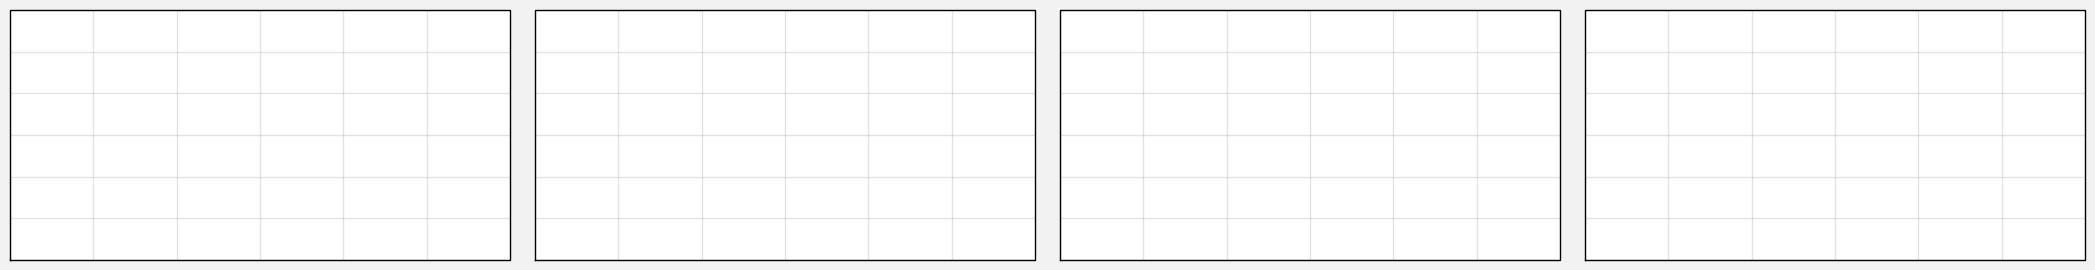

In [15]:
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## shapefile数据下载的位置：
## http://gaohr.win/site/blogs/2017/2017-04-18-GIS-basic-data-of-China.html
world_border_shapefile = "/m2data2/yycheng/data_stage/CN-border/World/country.shp"
river_border_shapefile =  "/m2data2/yycheng/data_stage/CN-border/R1/" + "hyd1_4l.shp"
province_shapefile    = "/m2data2/yycheng/data_stage/CN-border/Province/" + "province.shp"
southsea_shapefile     = "/m2data2/yycheng/data_stage/CN-border/SouthSea/" + "southsea_island.shp"
southsea_shapefile     = "/m2data2/yycheng/data_stage/CN-border/SouthSea/" + "nine_lines.shp"

fig, axs = pplt.subplots(ncols=4,nrows=1, proj=('cyl'))
plt.style.use(['science', 'no-latex']) # 采用 安装的scinence绘图风格，matplotlib风格拓展

for ax in axs:
    world     = shpreader.Reader(world_border_shapefile).geometries()
    river     = shpreader.Reader(river_border_shapefile).geometries()
    province = shpreader.Reader(province_shapefile).geometries()
    ax.add_geometries(world, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=1, zorder=1)
    ax.add_geometries(river, ccrs.PlateCarree(), facecolor='none', edgecolor='b', linewidth=1, zorder=1)
    ax.add_geometries(province, ccrs.PlateCarree(), facecolor='none', edgecolor='b', linewidth=1, zorder=1)
    # ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='b'))
# ----- format setting -----
axs.format(
abc=True,
lonlim=(70, 140), latlim=(15, 55),
# lonlim=(60, 100), latlim=(10, 40),
#----- 地图底图设置 -----s
reso = 'x-hi',
coast = False,
borders = False,
lakes = False,
ocean = False,
#-----GEO axis-----
labels = True,
gridlabelsize = 5,
gridminor = True,
# ticklen = 10,
# borderslinewidth=.5,
# longridminor= False,
# latgridminor= False,
# lonminorlocator = 
longrid  = True,
latgrid  = True,
# latlines = 10,
# lonlines = 10,
lonlocator = np.arange(70,140,10),
latlocator = np.arange(15,65,10),
lonminorlocator = np.arange(70,140+2,2),
latminorlocator = np.arange(15,55+2,2),
#-----line label-----
# linewidth = 0.5,
# suptitle="3000km-2000km bandpass 500hPa height(1998-06 timemean)",
suptitle="test map border",
)